# **Кластеризація та зменшення розмірності**

У сучасній добі бурхливого зростання даних, їх аналіз та розуміння критично важливі для різних сфер, включаючи бізнес та науку. Коли відсутні мітки для даних, навчання без учителя (Unsupervised Learning) дозволяє виявляти структури та залежності. Цей модуль допоможе вам осягнути цю тему, показавши важливість цих методів у виявленні складних залежностей.

**Основні області навчання без учителя:**

- **Кластеризація** - групування об'єктів за схожістю, як, наприклад, користувачів соцмереж за інтересами.
![image](https://serokell.io/files/q4/q49pm3tx.K-Means_Clustering_Algorithm_pic1_(1).png)

- **Зменшення розмірності** - зменшення числа ознак з максимальним збереженням інформативності, як у випадку обробки високодеталізованих зображень.
![image](https://hyperspec.ai/wp-content/uploads/2023/01/AE60A69B-203E-49E1-9AC4-C5289B6CCB32.png)

- **Виявлення аномалій** - пошук нестандартних даних або патернів, що відрізняються від звичайної поведінки, як виявлення шахрайства.
![image](https://documentation.mindsphere.io/MindSphere/apis/analytics-anomalydetection/images/DBSCAN.png)

- **Рекомендаційні системи** - пропозиції користувачу товарів або послуг на основі його активності та інтересів.
![image](https://miro.medium.com/v2/resize:fit:1064/1*mz9tzP1LjPBhmiWXeHyQkQ.png)



# **Кластеризація**
Кластеризація в навчанні без учителя - це групування подібних об'єктів, що допомагає категоризувати дані та виявити структуру в них. Це може включати:

- Групування користувачів соцмереж за інтересами для персоналізації реклами та контенту.
- Категоризація зображень для аналізу.
- Розподіл документів за темами для легкого пошуку.

Є безліч методів кластеризації, наприклад, алгоритм к-середніх, ієрархічна кластеризація, спектральна кластеризація тощо, вибір залежить від властивостей даних та задачі. Алгоритм к-середніх, який групує об'єкти, що мають близькі відносини, є найпоширенішим

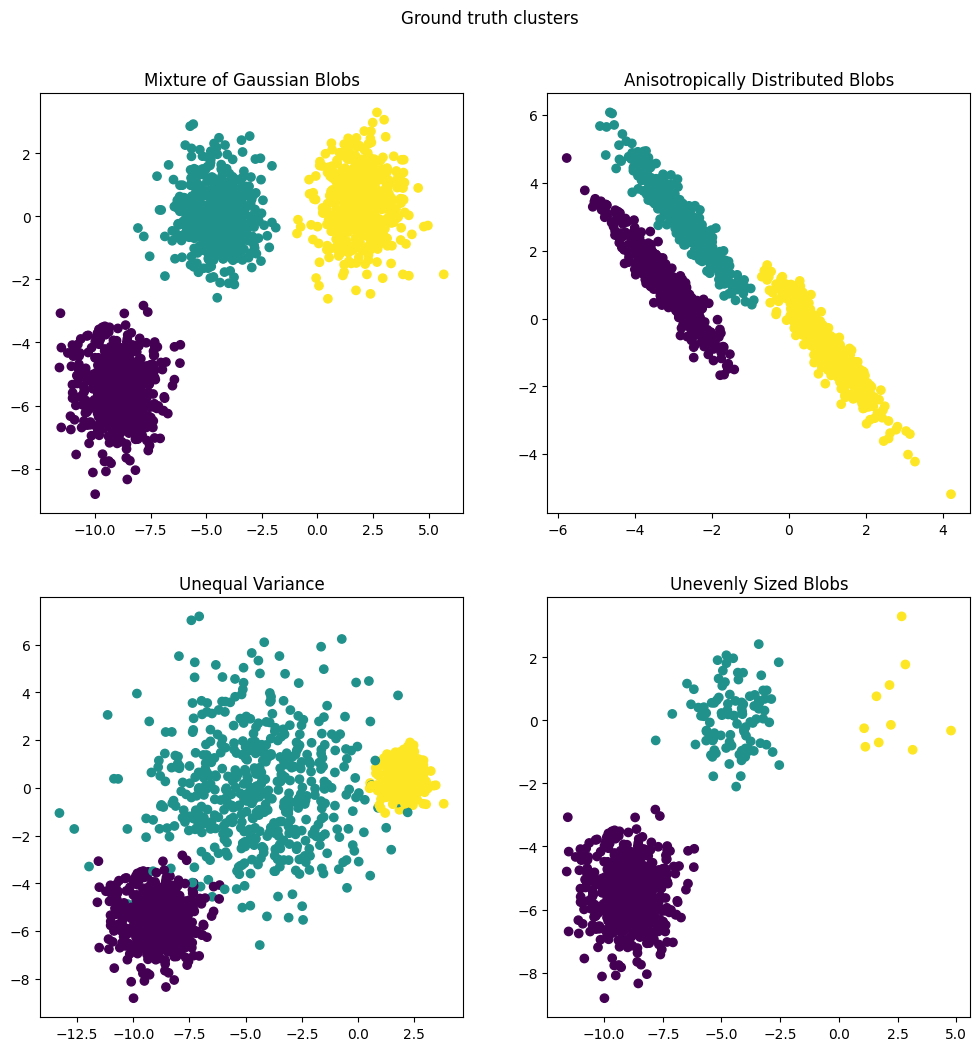

# **Алгоритм K-means**

#[Algorithms](https://scikit-learn.org/stable/modules/clustering.html)

![image](https://dashee87.github.io/images/kmeans.gif)

Алгоритм K-means є одним із найпоширеніших методів кластеризації. Основна ідея полягає в розподілі даних на кластери таким чином, що об'єкти в межах кластера є максимально схожими між собою, а між різними кластерами - максимально відмінні.


**Алгоритм K-means включає наступні кроки:**

1. Обрати кількість кластерів $K$, які потрібно сформувати.

2. Випадковим чином ініціалізувати початкові координати центроїдів (центрів) кластерів.

3. Призначити кожному об'єкту з датасету кластер з найближчим центроїдом за відстанню.

4. Обчислити нові координати центроїдів кластерів як середнє арифметичне всіх об'єктів, що належать до цього кластера.

5. Повторювати кроки 3 і 4 до моменту, коли будуть досягнуті встановлені умови зупинки (наприклад, досягнення максимальної кількості ітерацій або досягнення визначеної точності).

**Кінцевим результатом є набір кластерів та їх центроїди.**

Кожний кластер в алгоритмі K-means представлений центроїдом - точкою, що знаходиться в середині всіх об'єктів, що належать до кластера. Відстань між центроїдом і об'єктом зазвичай вимірюється за допомогою Евклідової відстані.

Таким чином, у нас є навчальний датасет $\{x^{(1)}, \ldots, x^{(m)}\}$, де $x^{(i)} \in \mathbb{R}^n$ є векторами ознак наших прикладів.
- Спочатку ми ініціалізуємо $K$ кластерів, і для цього вибираємо випадковим чином $K$ прикладів з навчального датасету та беремо їх вектори ознак як початкові координати центроїдів $\mu_j$.
- Потім для кожного прикладу присвоюємо йому клас, до якого він належить:
$c^{(i)} := j$, для якого мінімальне $\|x^{(i)} - \mu_j\|^2$,
де
  - $c^{(i)}$ - індекс центроїда, найближчого до прикладу $x^{(i)}$,
  - $\mu_j$ - координати (значення) $j$-го центроїда.
- Після вибору центрів кластерів, алгоритм K-means починає ітеративно оновлювати приналежність кожного зразка до кластера і переміщувати центроїди:
  $\mu_k := \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$,
  - де $C_k$ - це множина прикладів, які належать до кластера $k$.
  Наприклад, якщо лише два приклади $x^{(3)}$ та $x^{(5)}$ віднесені до центроїда $k = 2$, тоді ми оновлюємо його координати $\mu_2 = \frac{1}{2} (x^{(3)} + x^{(5)})$.
- Цей процес відбувається з метою мінімізації суми квадратів відстаней між кожним зразком і центром його кластера і продовжується до тих пір, поки центри кластерів не стабілізуються і не змінюють

$$J(c^{(1)}, \ldots, c^{(m)}, \mu_1, \ldots, \mu_K) = \sum_{i=1}^{m} \|x^{(i)} - \mu_{c^{(i)}}\|^2$$


## **Ініціалізація центроїдів K-means**
Це важливий етап, який впливає на результат кластеризації.

**Способи ініціалізації:**

- Випадковий вибір декількох зразків як початкових центрів.
= K-means++, що розміщує початкові центри на великій відстані від одного до одного.
- Метод K-medoids, що вибирає найбільш репрезентативні зразки.
- Підходи, що базуються на експертних знаннях або попередньому аналізі даних.
- Можна вибрати центри випадково, запустити алгоритм 100 разів і обрати результат з найкращим показником втрат.

## **Підбір кількості кластерів**

**Підбір кількості кластерів** є ключовим при використанні K-means. Це може залежати від доменних знань та вимог до кластеризації, або коли таких знань немає - від використання евристик і метрик.

**Один з популярних методів - "метод ліктя" (elbow method)**, що включає обчислення distortion cost function для різних значень K (кількість кластерів) та аналіз отриманих результатів. Графік "ліктя" відображає залежність втрат від кількості кластерів. "Лікоть" на графіку вказує на оптимальну кількість кластерів.


![image](https://miro.medium.com/v2/resize:fit:510/1*mUjeYMsjwPbKsgCblTlv4w.png)




In [167]:
# Downloading data

import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
# y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)

display(df)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [168]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


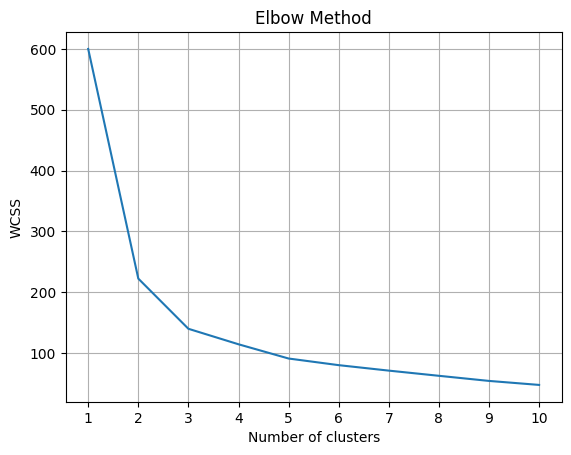

In [116]:
# Elbow method

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.xticks(np.arange(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


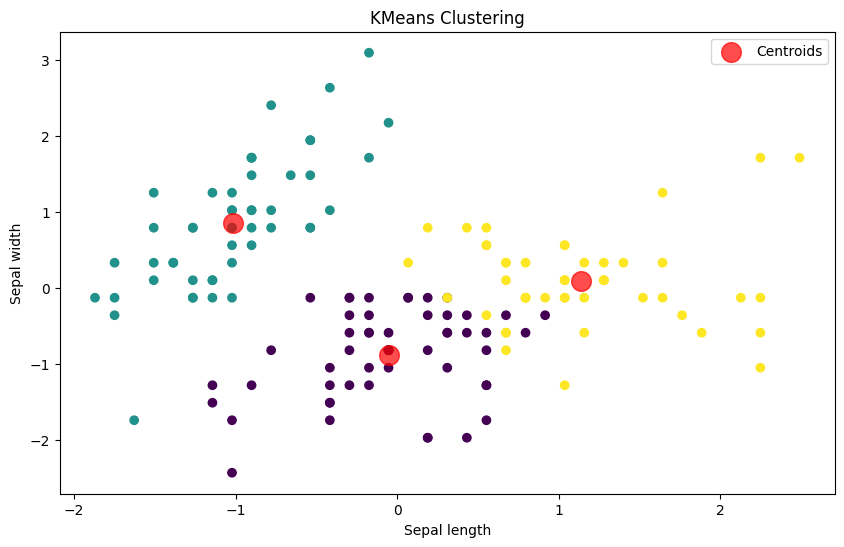

In [117]:
# KMeans clustering and visualization
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')

# plot the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()




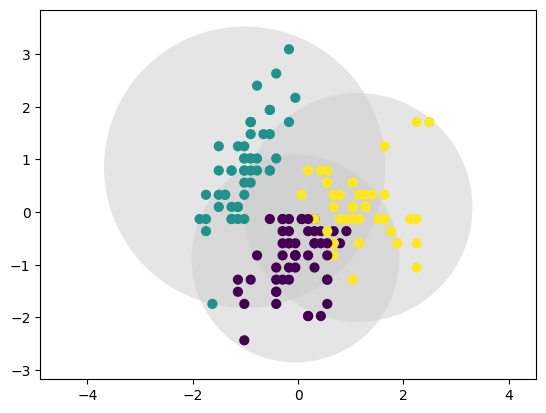

In [118]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

plot_kmeans(kmeans, X)


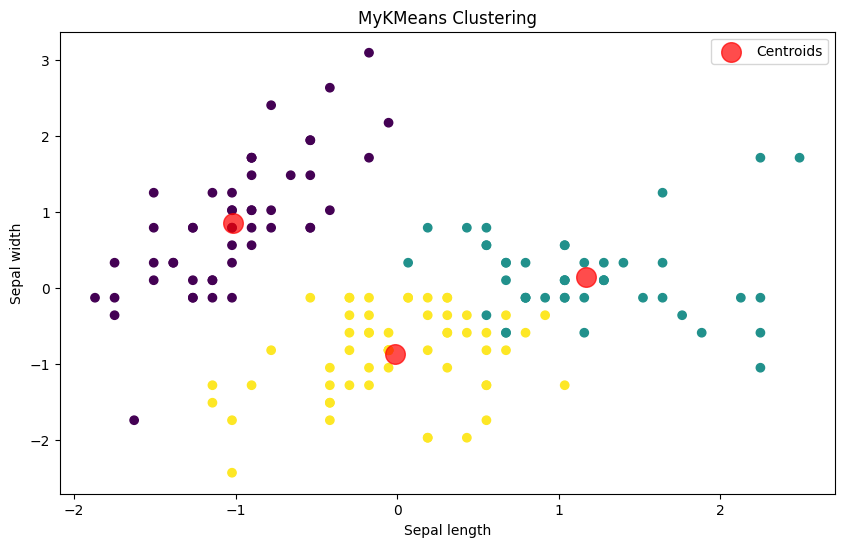

In [175]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.stats import kde

class MyKMeans:
    def __init__(self, n_clusters=3, max_iter=300, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        np.random.seed(random_state)

    def fit(self, X):
        self.cluster_centers_ = X[np.random.choice(len(X), self.n_clusters)]
        for _ in range(self.max_iter):
            self.labels_ = cdist(X, self.cluster_centers_).argmin(axis=1)
            new_centers = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.cluster_centers_ == new_centers):
                break
            self.cluster_centers_ = new_centers

    def fit_predict(self, X):
        return cdist(X, self.cluster_centers_).argmin(axis=1)

# perform KMeans clustering
kmeans_ = MyKMeans(n_clusters=3)
kmeans_.fit(X[:,:4])

# create scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_.labels_, cmap='viridis')

# plot the centers
centers = kmeans_.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, label='Centroids')
plt.title('MyKMeans Clustering')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()


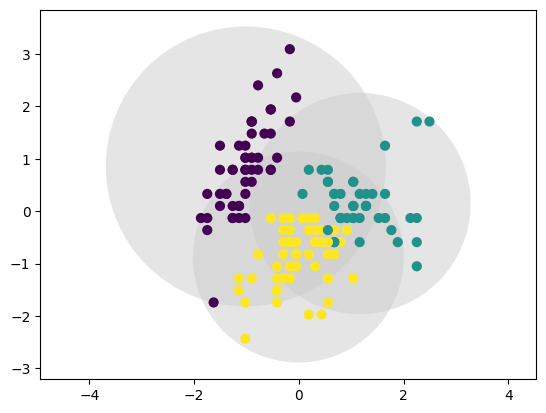

In [170]:
plot_kmeans(kmeans_, X)

In [173]:
kmeans.cluster_centers_, kmeans_.cluster_centers_

(array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
        [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
        [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]]),
 array([[-1.01457897,  0.85326268, -1.30498732, -1.25489349],
        [ 1.16743407,  0.14530299,  1.00302557,  1.0300019 ],
        [-0.01139555, -0.87600831,  0.37707573,  0.31115341]]))

In [171]:
pd.crosstab(kmeans_.labels_, kmeans.labels_)

col_0,0,1,2
row_0,,,
0,0,50,0
1,0,0,44
2,53,0,3



**K-Means:**

**Переваги:**

1. Легкий для розуміння та реалізації.
2. Ефективний за часом виконання.
3. Якщо у вас є чіткі групи, K-Means дасть гарні результати.

**Недоліки:**

1. Чутливий до початкових центроїдів, вибраних на початку.
2. Не працює добре, коли кластери мають нерегулярні форми.
3. Необхідно заздалегідь визначити кількість кластерів, яка може бути невідомою.
4. Чутливий до викидів.


# **Зменшення розмірності**
**Зменшення розмірності** - це ключова задача машинного навчання, яка полягає в зниженні кількості ознак, що описують об'єкти, з максимальним збереженням інформативності. Це допомагає скоротити складність аналізу даних, зменшити час навчання моделі та покращити її продуктивність.

**Є два основних типи підходів до зменшення розмірності:**
- **Лінійні**. Лінійні підходи застосовують лінійне перетворення, що перетворює оригінальні ознаки на новий набір. Найвідомішим лінійним методом є аналіз головних компонент (PCA), який визначає головні компоненти даних, що відповідають найбільшій дисперсії.
- **Нелінійні**. Нелінійні підходи, як правило, використовують нейронні мережі для виявлення складних залежностей між ознаками та зменшення розмірності даних до потрібного рівня.

Зменшення розмірності важливе для підготовки даних до аналізу та моделювання, і воно може бути корисним в різних областях, включаючи комп'ютерний зір, обробку природних мов, рекомендаційні системи, аналіз даних соціальних мереж та багато іншого. Також, зменшення розмірності часто використовують для візуалізації даних, оскільки ми можемо зображувати лише дво- чи тривимірні графіки, а при більшому числі ознак потрібно зменшити розмірність до 2 чи 3.

![image](https://hyperspec.ai/wp-content/uploads/2023/01/AE60A69B-203E-49E1-9AC4-C5289B6CCB32.png)

## **Principal Component Analysis (PCA)**

**Principal Component Analysis (PCA)** - популярний метод зменшення розмірності даних, який зменшує кількість змінних, зберігаючи максимум інформації. Він створює нові координати, відображаючи змінність даних - головні компоненти.

**Процес PCA:**

1. Стандартизація даних для однакового масштабу.
2. Розрахунок коваріаційної матриці для показу взаємозв'язків.
3. Розрахунок власних векторів і значень для створення головних компонент.
4. Сортуємо власні вектори по зменшенню значень власних значень.
5. Відбір кількості головних компонент для збереження інформації.

PCA допомагає поліпшити швидкодію алгоритмів машинного навчання, зменшує шум і дозволяє візуалізувати дані в низькорозмірному просторі. Головні компоненти - це напрямки з максимальною дисперсією даних, з урахуванням попередніх компонент. За допомогою PCA можна зменшити, наприклад, 100 ознак до 10 головних компонент, що поліпшить роботу алгоритмів машинного навчання.


In [177]:
# help(PCA)

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
# y = data.target
df = pd.DataFrame(data.data, columns=data.feature_names)

display(df.head(2))
# assuming df is your DataFrame and the columns are your features
# 1. Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 2. Apply PCA
pca = PCA(3)
principalComponents = pca.fit_transform(df_scaled)

# 3. Create a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['PC' + str(x) for x in range(1, len(df.columns[:3])+1)])
display(principalDf.head(2))

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


,PC1,PC2,PC3
0,9.192837,1.948583,-1.123173
1,2.387802,-3.768172,-0.529297


In [201]:
import plotly.graph_objects as go
import plotly.express as px

# 4. Visualize initial data
fig = px.scatter_3d(df, x=df.columns[0], y=df.columns[1], z=df.columns[2], title='Initial Data')
fig.show()

# 4. Visualize the results in a 2D plot
fig = px.scatter_3d(principalDf, x='PC1', y='PC2', z='PC3', title='PCA on Your Data')
fig.show()





In [202]:
pca.explained_variance_/pca.explained_variance_.sum()

array([0.60950217, 0.2611802 , 0.12931763])

In [203]:
# 5. Візуалізуйте відносну дисперсію, що пояснюється різними головними компонентами (власні числа)
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
fig = go.Figure(data=go.Scatter(x=list(range(1, len(df.columns)+1)),
                                y=explained_variance_ratio_cumsum))
fig.update_layout(title='Дисперсія, що пояснюється різними головними компонентами',
                  xaxis_title='Кількість головних компонент',
                  yaxis_title='Кумулятивна дисперсія, що пояснюється')
fig.show()


In [211]:
pd.DataFrame(pca.components_, columns=df.columns, index=["PC1", "PC2", "PC3"])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
PC3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,...,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791


In [212]:
# # 6. Показати навантаження оригінальних змінних на перші декілька головних компонент (власні вектори)
# components = pd.DataFrame(pca.components_, columns=df.columns,
#                           index=['PC' + str(x) for x in range(1, len(df.columns)+1)])
# print("Навантаження оригінальних змінних на перші декілька головних компонент: \n",
#       display(components.head()))


## **Імплементація PCA**

**1. Стандартизація набору даних**

Цей крок виконується для того, щоб кожна ознака мала середнє значення 0 та стандартне відхилення 1. Формула стандартизації ознаки x є наступною:

$$x' = \frac{x - \mu}{\sigma}$$

де x' - це стандартизована ознака, x - це оригінальна ознака, µ - це середнє значення ознаки, а σ - це стандартне відхилення ознаки.

**2. Обчислення матриці коваріації**

Коваріація між двома ознаками X та Y обчислюється за формулою:

$$cov(X,Y) = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{n - 1}$$

де
- $x_i$ та $y_i$ - це окремі спостереження,
- $x̄$ - це середнє значення x спостережень,
- $ȳ$ - це середнє значення y спостережень,
- а $n$ - це кількість спостережень.

Матриця коваріації для набору ознак складається з коваріації кожної пари ознак. Якщо у нас є d ознак, матриця коваріації - це матриця d x d, а елемент в i-му рядку та j-му стовпці - це коваріація між i-ю та j-ю ознаками.

**3. Обчислення власних значень та власних векторів матриці коваріації**

Власний вектор v матриці A - це вектор, який, коли A помножено на v, дає скалярне кратне значення v, скаляр є відповідним власним значенням λ:

$$Av = \lambda v$$

**4. Сортування власних значень та відповідних власних векторів.**

Немає конкретної формули для цього кроку, просто сортуємо на основі значень власних чисел.

**5. Вибір перших n власних векторів (n - це кількість вимірів)**

Також немає конкретної формули для цього кроку. Просто вибираємо перші n власних векторів після сортування.

**6. Трансформація даних**

Дані зі зменшеними вимірами Y можна отримати, взявши скалярний добуток транспонованих вибраних власних векторів і транспонованих масштабованих даних X:

$$Y = V^T X^T$$

- де V - це матриця вибраних власних векторів,
- X - це оригінальна матриця даних,
- T означає транспонування матриці,
- а Y - це трансформовані дані.

In [229]:
import numpy as np

# Step 1: Standardize the dataset
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(df_scaled.T)

# Step 3: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
display(eigenvalues[:10])
display(eigenvectors[:3,:5])

# Step 4: Sort eigenvalues and corresponding eigenvectors.
eigenvalue_idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[eigenvalue_idx]
eigenvectors_sorted = eigenvectors[:, eigenvalue_idx]
display(eigenvalues_sorted[:10])
display(eigenvectors[:3,:5])

# Step 5: Select the first n eigenvectors (n is the number of dimensions)
n_components = 3 # You can choose any number of components.
eigenvectors_subset = eigenvectors_sorted[:, 0:n_components]
display(eigenvectors_subset[:3,:])

# Step 6: Transform the data
X_reduced = np.dot(eigenvectors_subset.T, df_scaled.T).T

# Now X_reduced contains the projection of df_scaled onto the first n principal components


array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

array([[ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635],
       [ 0.10372458, -0.05970609,  0.0645499 , -0.60305   ,  0.04946885],
       [ 0.22753729, -0.21518136, -0.00931422,  0.0419831 , -0.03737466]])

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888,  0.47745625,  0.41762878,  0.35131087])

array([[ 0.21890244, -0.23385713, -0.00853124,  0.04140896, -0.03778635],
       [ 0.10372458, -0.05970609,  0.0645499 , -0.60305   ,  0.04946885],
       [ 0.22753729, -0.21518136, -0.00931422,  0.0419831 , -0.03737466]])

array([[ 0.21890244, -0.23385713, -0.00853124],
       [ 0.10372458, -0.05970609,  0.0645499 ],
       [ 0.22753729, -0.21518136, -0.00931422]])

In [231]:
X_reduced[:10], principalComponents[:10, :3]

(array([[ 9.19283683,  1.94858307, -1.12316616],
        [ 2.3878018 , -3.76817174, -0.52929269],
        [ 5.73389628, -1.0751738 , -0.55174759],
        [ 7.1229532 , 10.27558912, -3.23278955],
        [ 3.93530207, -1.94807157,  1.38976673],
        [ 2.38024715,  3.9499289 , -2.93487679],
        [ 2.23888331, -2.69003128, -1.63991293],
        [ 2.1432985 ,  2.34024401, -0.87194726],
        [ 3.17492429,  3.39181295, -3.11998591],
        [ 6.35174679,  7.72717407, -4.34191581]]),
 array([[ 9.19283681,  1.94858297, -1.12317259],
        [ 2.38780179, -3.7681717 , -0.52929714],
        [ 5.73389628, -1.07517379, -0.55174747],
        [ 7.12295319, 10.27558911, -3.23279298],
        [ 3.93530207, -1.94807156,  1.38976274],
        [ 2.38024715,  3.94992891, -2.93487676],
        [ 2.2388833 , -2.69003129, -1.63991463],
        [ 2.1432985 ,  2.34024402, -0.87194772],
        [ 3.17492429,  3.39181293, -3.11998535],
        [ 6.3517468 ,  7.72717422, -4.341915  ]]))


**PCA (метод головних компонент):**

**Переваги:**

1. Він знижує розмірність даних, зберігаючи при цьому максимум інформації.
2. Видаляє шуми та поліпшує візуалізацію даних.
3. Він може бути корисним для виявлення шаблонів, кореляцій та структури даних.

**Недоліки:**

1. Він робить припущення про лінійну кореляцію між ознаками.
2. Втрата інформації через зниження розмірності.
3. Може бути складно інтерпретувати компоненти, особливо якщо вони не корелюють з оригінальними ознаками.
4. Не підходить для даних, де всі ознаки мають важливість, так як PCA прибирає менш значущі ознаки.

# **Додаткова інформація**

## **T-SNE (t-Distributed Stochastic Neighbor Embedding)** (Dimensionality Reduction)

![image](https://3.bp.blogspot.com/-NE01azL_JxU/Wxli17oYNzI/AAAAAAAACxQ/axOI2yy-Ft0QbqaekOyemm5Xn0wAFvRUwCLcBGAs/s640/image2.gif)

#[Demo](https://jefworks.github.io/tsne-online/)

#[Demo](https://dash.gallery/dash-tsne/)

**T-SNE (t-Distributed Stochastic Neighbor Embedding)** це техніка зменшення розмірності, яка особливо добре підходить для візуалізації даних високої розмірності. Алгоритми, що стоять за t-SNE, є досить складними. Ось спрощене пояснення:

**T-SNE** - це ймовірнісна техніка, яка в основному використовується для візуалізації даних високої розмірності в просторі низької розмірності (як-от 2D або 3D). Вона працює шляхом розрахунку ймовірності подібності точок у просторі високої розмірності та розрахунку подібних ймовірностей у просторі низької розмірності. Потім вона мінімізує різницю між цими умовними ймовірностями у просторі вищої та нижчої розмірності для ідеального відображення точок даних у просторі нижчої розмірності.

Важливо зауважити, що, хоча PCA є лінійним алгоритмом, **t-SNE є нелінійним** та зберігає тільки малі парні відстані або локальні подібності, тоді як PCA орієнтований на збереження великих парних відстаней, щоб максимізувати варіантність.

**Основні моменти t-SNE:**

1. T-SNE використовує розподіл Стьюдента для обчислення подібності між двома точками у просторі нижчої розмірності.
2. Це ітеративний алгоритм, який починається з випадкового розв'язку, а потім поступово уточнює його.
3. Функція вартості в t-SNE не є випуклою, тобто з різними початковими значеннями ми можемо отримати різні результати.
4. Настійно рекомендується використовувати інший метод зниження розмірності (наприклад, PCA для щільних даних або TruncatedSVD для розріджених даних) для зниження кількості розмірностей до розумного рівня (наприклад, 50), якщо кількість ознак дуже висока. Це зменшить деякий шум і прискорить обчислення парних відстаней між зразками.

**Переваги t-SNE:**

1. Це відмінний інструмент для візуалізації даних. Графіки виглядають візуально привабливо і їх легко інтерпретувати неспеціалістом.
2. Він дуже добре відображає структуру даних.
3. Він був широко використаний в обробці зображень, NLP, геномних даних та обробці мови.

**Недоліки t-SNE:**

1. Це обчислювально важкий. Комплексність t-SNE - це O(n^2), що робить його недосяжним для великих наборів даних.
2. Результати не стабільні, і з різними запусками ви можете спостерігати різні результати.
3. Не гарантується, що близькі точки в просторі t-SNE є близькими в оригінальному просторі.

Бібліотека Scikit-Learn в Python має вбудовану підтримку t-SNE, що робить його легким у використанні. Стандартний спосіб використання t-SNE на практиці - спочатку зменшити розмірність ваших даних за допомогою іншого методу (наприклад, PCA), а потім застосувати t-SNE. Це зазвичай дає кращі результати та прискорює процес.

Алгоритм t-SNE - потужний інструмент для візуалізації даних високої розмірності шляхом проектування їх у простір нижчої розмірності, але як завжди, важливо враховувати специфіку вашого завдання, характер ваших даних та компроміси, які ви готові укласти.



Першим кроком є обчислення ймовірностей $p_{ij}$, які представляють подібність між парами точок у просторі вищої розмірності. Вони обчислюються за наступною формулою:

$$
p_{ij} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma^2)}{\sum_{k \neq l} \exp(-||x_k - x_l||^2 / 2\sigma^2)}
$$

Де $x_i$ та $x_j$ - це точки у вихідному просторі вищої розмірності. $\sigma$ - це гауссова перетворювач, який зазвичай вибирається окремо для кожної точки таким чином, щоб близькість всіх точок була на певному рівні, наприклад, 0.7.

Після цього ми обчислюємо ймовірності $q_{ij}$, які представляють подібність між парами точок у просторі нижчої розмірності. Вони обчислюються за наступною формулою:

$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$

Де $y_i$ та $y_j$ - це точки у виходовому просторі нижчої розмірності.

Останнім кроком є мінімізація розбіжності Кульбака-Лейблера між двома розподілами $P$ та $Q$, що вимірює, наскільки один розподіл відрізняється від іншого.

$$
C = KL(P || Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

Алгоритм t-SNE зводиться до пошуку значень $y_i$ (точок у просторі нижчої розмірності), які мінімізують цю витрату.


In [234]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [233]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import pandas as pd
import plotly.express as px

# Load iris data
iris = load_breast_cancer()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target = iris.target

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(df_scaled)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['target'] = target

# Visualize the t-SNE 2D representation
fig = px.scatter(tsne_df, x='t-SNE 1', y='t-SNE 2', color='target')
fig.show()


## **Гауссова суміш моделей (GMM)** (Clusterization) Expectation-Maximization Algorithm (EM)

![image](https://www.mlpack.org/gsocblog/images/5_clusters_QGMM.gif)

![image](https://cdn-images-1.medium.com/max/640/1*OyXgise21a23D5JCss8Tlg.gif)

**Гауссова суміш моделей (GMM)** - це тип ймовірнісної моделі, яка припускає, що всі точки даних генеруються з мішанини скінченної кількості гауссових розподілів з невідомими параметрами. Це тип алгоритму м'якої кластеризації, що означає, що кожна точка даних може належати до більше ніж одного кластера з різними рівнями членства. Це може бути особливо корисно, коли кластери перекриваються.

Ось поетапні інструкції щодо роботи моделі Гауссова суміш моделей (GMM):

1. **Ініціалізація**: Ініціалізуйте параметри гауссового розподілу. Це може бути середнє та коваріація кожного розподілу та коефіцієнти змішування (або ваги) для кожного гауссового розподілу в моделі. Кількість розподілів визначає користувач. Ці параметри можна ініціалізувати випадково або за допомогою такого методу, як k-середніх.

2. **Крок очікування (E-Step)**: На цьому кроці алгоритм обчислює очікування прихованих змінних, враховуючи поточні параметри моделі. Це здійснюється шляхом обчислення апостеріорних ймовірностей того, що точка даних належить до певного кластера. Це також відомо як відповідальність кластера за цю точку даних.

Формула для цього кроку може бути виражена як:

$$p(z | x, \theta) = \frac{p(x | z, \theta) p(z | \theta)}{p(x | \theta)}$$

де:
  - *x* - це точка даних
  - *z* - це прихована змінна
  - *θ* - це набір параметрів моделі (середнє, коваріація та ваги)

Звісно, ось вдосконалений пояснення кроку 3 з врахуванням вашого запитання:

3. **Крок Оновлення параметрів змішування та коваріаційної матриці**

- **Оновлення ваг кластерів (змішування параметрів)**:
   Ваги кластерів можна оновити, використовуючи наступну формулу, де \( r \) є відповідальністю, а \( N \) є кількістю точок даних:
   $$\pi_k = \frac{\sum_{i=1}^N r_{ik}}{N}$$

- **Оновлення середніх (центрів кластерів)**:
   Середні можна оновити, використовуючи наступну формулу, де \( r \) є відповідальністю, а \( x \) є точками даних:
   $$\mu_k = \frac{\sum_{i=1}^N r_{ik} \cdot x_i}{\sum_{i=1}^N r_{ik}}$$

- **Оновлення коваріаційних матриць**:
   Коваріаційні матриці можна оновити за допомогою наступної формули:
   $$\Sigma_k = \frac{\sum_{i=1}^N r_{ik} \cdot (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^N r_{ik}}$$
   тут $r$ відповідальність (probability), $x$ точки даних, а $\mu$ центри кластерів.

Ці оновлення здійснюються під час M-кроку (крок максимізації) в алгоритмі EM для GMM. Їх метою є максимізація очікуваної логарифмічної правдоподібності (E-крок), враховуючи поточні відповідальності (r), що були розраховані на попередньому E-кроці.

4. **Збіжність**: Два вище зазначені кроки повторюються до тих пір, поки не збіжаться параметри моделі. Це можна перевірити, перевіривши, чи збільшення логарифмічної правдоподібності між послідовними ітераціями є нижчим за невеликий поріг.


In [243]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import plotly.express as px
import pandas as pd

# Завантажити дані
iris = load_iris()
X = iris.data

# Стандартизуйте функції
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Застосувати модель Гауссова суміш моделей
gmm = GaussianMixture(n_components=3, covariance_type="spherical")
gmm.fit(X_scaled[:,:2])
labels = gmm.predict(X_scaled[:,:2])

# Створити DataFrame для візуалізації
df = pd.DataFrame(X_scaled, columns=iris.feature_names)
df['label'] = labels

# Нанести кластери
fig = px.scatter(df, x='sepal length (cm)', y='sepal width (cm)', color='label')
fig.show()


## **Ієрархічна кластеризація** (Clusterization)

![image](https://dashee87.github.io/images/hierarch.gif)

**Ієрархічна кластеризація** - це метод, який будує ієрархію кластерів, використовуючи різні алгоритми, які групують схожі об'єкти разом у кластери.

Основні кроки для Ієрархічної кластеризації:

1. **Крок 1**: Обчислення матриці відстаней. Це матриця, що містить відстані між усіма парами об'єктів. Як правило, для цього використовуються такі метрики, як Евклідова відстань або Косинусна відстань.

$$d(X, Y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

2. **Крок 2**: Об'єднання двох найближчих об'єктів (які мають найменшу відстань) у кластер.

3. **Крок 3**: Оновлення матриці відстаней. Видаляємо рядки та стовпці, що відповідають об'єднаним об'єктам, та додаємо новий рядок та стовпець, що відповідають новому кластеру.

4. **Крок 4**: Повторення кроків 2-3 до тих пір, поки не буде залишено лише один кластер, що містить усі об'єкти.

Ієрархічну кластеризацію можна візуалізувати за допомогою дендрограми, яка показує, як об'єкти об'єднуються у кластери.

Після створення дендрограми, ви можете вибрати оптимальну кількість кластерів, використовуючи метод ліктя (Elbow method) або метод силуета (Silhouette method).

Крім того, ви також можете використовувати `AgglomerativeClustering` з `sklearn.cluster` для виконання ієрархічної кластеризації.

Зверніть увагу, що ієрархічна кластеризація може бути часом вимогливою до ресурсів, особливо при великих наборах даних.

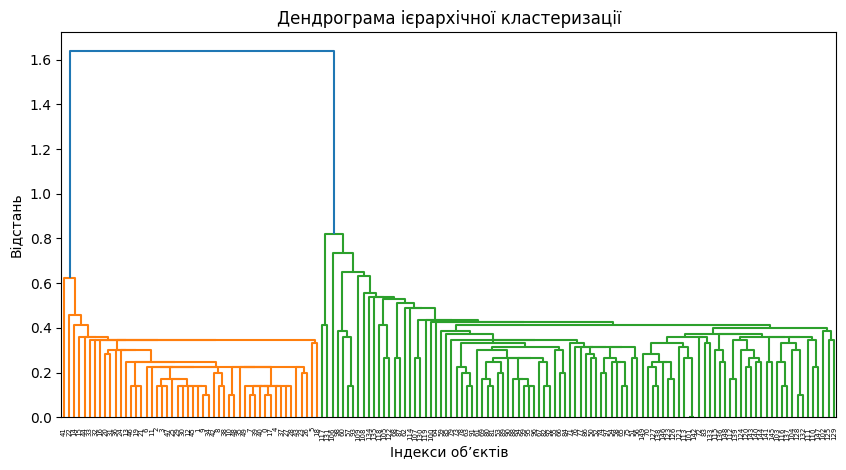

In [244]:
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt

# Завантажити дані
iris = load_iris()
X = iris.data

# Обчислення матриці зв'язку
Z = linkage(X, 'single')

fig = plt.figure(figsize=(10, 5))
dn = dendrogram(Z)
plt.title('Дендрограма ієрархічної кластеризації')
plt.xlabel('Індекси об’єктів')
plt.ylabel('Відстань')
plt.show()



Параметр `linkage` у агломеративній кластеризації визначає, як обчислюється відстань між кластерами. Існує кілька варіантів, які можна вибрати:

1. `ward`: використовує метод Варда, який мінімізує варіанс між кластерами. Цей метод вимагає, щоб простір був євклідовим, і обчислює відстань як суму квадратичних різниць всередині кластерів.

2. `complete` або `maximum` linkage: обчислює відстань між двома кластерами як найбільшу відстань між елементами двох кластерів.

3. `average`: обчислює відстань як середнє арифметичне відстаней між всіма парами елементів, що належать різним кластерам.

4. `single`: обчислює відстань як найменшу відстань між елементами двох кластерів.

Ці варіанти linkage впливають на форму і розмір об'єднаних кластерів. Залежно від ваших даних і завдання, може бути корисним експериментувати з різними варіантами linkage.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



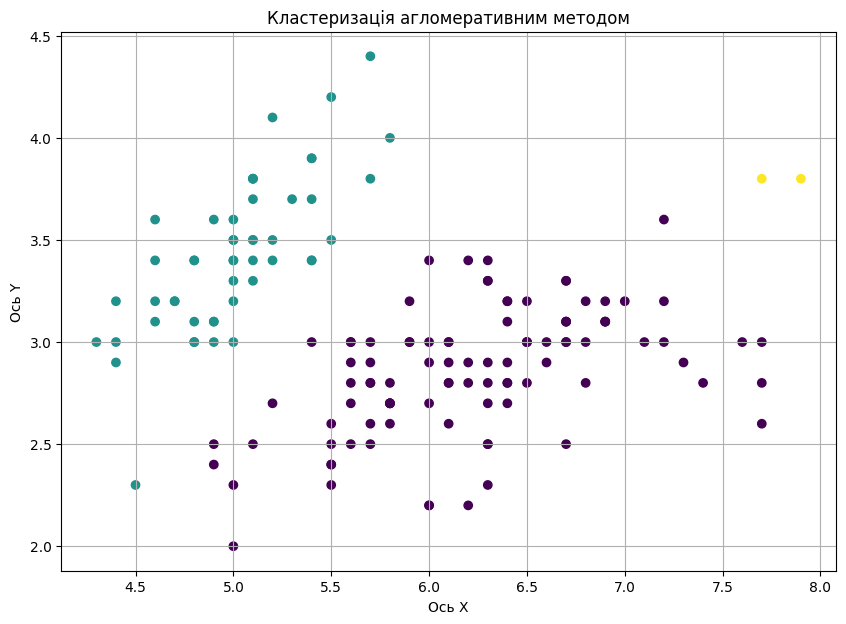

In [248]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Створюємо модель
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')

# Навчаємо модель
cluster.fit_predict(iris.data)

# Візуалізуємо результати
plt.figure(figsize=(10, 7))
plt.scatter(iris.data[:,0], iris.data[:,1], c=cluster.labels_, cmap='viridis')

plt.title('Кластеризація агломеративним методом')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.grid(True)

plt.show()


## **DBSCAN** (Clusterization)

![image](https://cdn-images-1.medium.com/max/640/1*tc8UF-h0nQqUfLC8-0uInQ.gif)

![image](https://i.pinimg.com/originals/bb/3d/5e/bb3d5e522cbcb2dd07a81f8118de2041.gif)

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) це метод кластеризації, який використовується для визначення груп (кластерів) на основі їх щільності у просторі даних.

### Кроки алгоритму DBSCAN:

1. Алгоритм починається з випадково вибраної точки, яка ще не була відвідана. Він обчислює відстань до всіх інших точок, і якщо в радіусі `eps` є `min_samples` точок, то починається новий кластер.

2. Якщо в радіусі `eps` недостатньо точок, то дана точка вважається шумом і алгоритм переходить до наступної точки.

3. Якщо новий кластер було почато, алгоритм збільшує цей кластер, додаючи до нього всі сусідні точки, що знаходяться в радіусі `eps` від будь-якої точки в кластері.

4. Процес продовжується до тих пір, поки всі точки не будуть відвідані.

Перевага DBSCAN полягає в тому, що він може виявляти кластери будь-якої форми, в той час як інші методи, такі як K-середніх або ієрархічна кластеризація, мають тенденцію виявляти кластери сферичної форми.

У той час як DBSCAN є потужним інструментом, він має декілька обмежень. Для початку, він може мати проблеми з виявленням кластерів з різною густиною. Крім того, він може виявити складності з великими наборами даних, оскільки він має квадратичну складність.

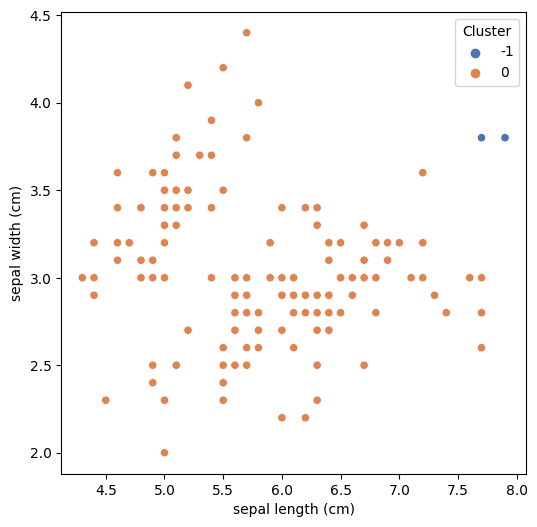

In [254]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Завантажити дані
iris = load_iris()
X = iris.data

# Використати DBSCAN
dbscan = DBSCAN(eps=0.5)
dbscan.fit(X[:,:2])

# Створити DataFrame для побудови графіка
df = pd.DataFrame(X, columns=iris.feature_names)
df["label"] = dbscan.labels_

# Побудувати графік результатів
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue="label", palette="deep")
plt.legend(title='Cluster')
plt.show()
